In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("uploads/noisy_grocery_data.csv")

# Show first 5 rows
df.head()


,Item Name,Store Name,Price,Stock Status,Expiration Date
0,Cheese,Amazon,4.37,Low Stock,NaN
1,Cheese,Amazon,9.56,Out of Stock,18-04-2025
2,Banana,Target,7.59,Low Stock,23-04-2025
3,Tomato,Kroger,6.39,Low Stock,01-04-2025
4,Tomato,Walmart,2.40,In Stock,22-04-2025


In [2]:
# Check missing values
df.isnull().sum()

# Check duplicate rows
df.duplicated().sum()

# Check data types
df.dtypes


Item Name           object
Store Name          object
Price              float64
Stock Status        object
Expiration Date     object
dtype: object

In [3]:
# Drop rows where Store Name is missing
df = df.dropna(subset=["Store Name"])

# Fill missing Price with the median price
df["Price"].fillna(df["Price"].median(), inplace=True)


C:\Users\narap\AppData\Local\Temp\ipykernel_32032\4046642926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price"].fillna(df["Price"].median(), inplace=True)


In [4]:
df = df.drop_duplicates()


In [5]:
# Convert 'Expiration Date' to datetime format, handling errors
df["Expiration Date"] = pd.to_datetime(df["Expiration Date"], errors="coerce")

# Fill missing expiration dates with a default future date (e.g., 30 days from today)
df["Expiration Date"].fillna(pd.Timestamp.today() + pd.Timedelta(days=30), inplace=True)


C:\Users\narap\AppData\Local\Temp\ipykernel_32032\2442871384.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Expiration Date"] = pd.to_datetime(df["Expiration Date"], errors="coerce")
C:\Users\narap\AppData\Local\Temp\ipykernel_32032\2442871384.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Expiration Date"].fillna(pd.Timestamp.today() + pd.Timedelta(days=30), inplace=True)


In [6]:
df.to_csv("uploads/cleaned_grocery_data.csv", index=False)
print("✅ Cleaned Data Saved Successfully!")


✅ Cleaned Data Saved Successfully!


In [7]:
# Load the cleaned dataset to verify
df_cleaned = pd.read_csv("uploads/cleaned_grocery_data.csv")
df_cleaned.head()


,Item Name,Store Name,Price,Stock Status,Expiration Date
0,Cheese,Amazon,4.37,Low Stock,2025-04-27 10:12:16.663447
1,Cheese,Amazon,9.56,Out of Stock,2025-04-18 00:00:00.000000
2,Banana,Target,7.59,Low Stock,2025-04-23 00:00:00.000000
3,Tomato,Kroger,6.39,Low Stock,2025-04-01 00:00:00.000000
4,Tomato,Walmart,2.40,In Stock,2025-04-22 00:00:00.000000


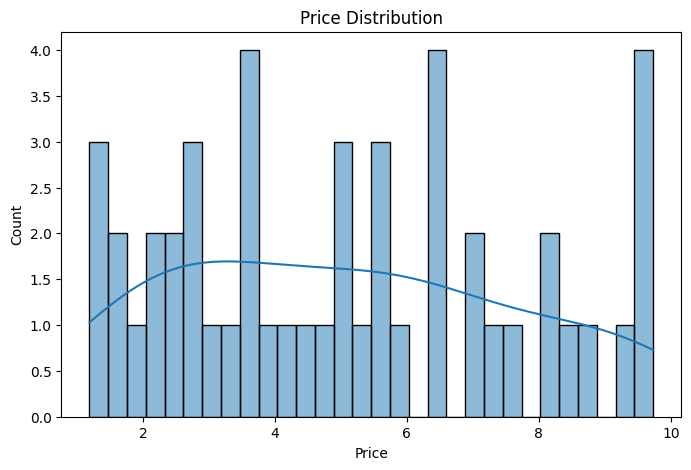

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["Price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# # Stock Status Distribution
# plt.figure(figsize=(6,4))
# sns.countplot(x="Stock Status", data=df_cleaned, order=df_cleaned["Stock Status"].value_counts().index)
# plt.title("Stock Status Distribution")
# plt.xticks(rotation=45)
# plt.show()

# # Expiring Soon Analysis
# plt.figure(figsize=(6,4))
# sns.countplot(x="Expiring Soon", data=df_cleaned)
# plt.title("Products Expiring Soon")
# plt.show()

# # Correlation Heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()
